In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(30,15)},font_scale=1.5)

monomarental = pd.read_csv('monomarental.csv')

monomarental.sample(3)

,sexo,edad,genero,ascendencia,estado_laboral,sueldo,busca_otro_trabajo,actividad,asistencia alguna vez a enseñanza,edu preescolar,edu primaria,edu media,edu técnica,edu univ o simil,edu terciario no uni,edu posgrado,edu mag prof,hijos
27862,2.0,77.0,Mujer,Blanca,"Inactivo, jubilado",0.0,0.0,NaN,Sí,No asistió,"Sí, asistió","Sí, asistió",No asistió,0.0,0.0,0.0,0.0,0
18767,2.0,70.0,Mujer,Blanca,"Inactivo, jubilado",0.0,0.0,NaN,Sí,No asistió,"Sí, asistió",No asistió,No asistió,0.0,0.0,0.0,0.0,1
13955,2.0,65.0,Mujer,Asiática o amarilla,Ocupados,16000.0,No,Actividades de los hogares en calidad de emple...,Sí,"Sí, asistió","Sí, asistió",No asistió,No asistió,0.0,0.0,0.0,0.0,1


In [2]:
monomarental['busca_otro_trabajo'] = monomarental['busca_otro_trabajo'].astype('str')

monomarental = monomarental[~monomarental['busca_otro_trabajo'].str.contains('0.0')]

In [3]:
for i in list(monomarental.columns):
    if monomarental[i].dtype == 'object':
        monomarental[i] = monomarental[i].astype("category").cat.codes

monomarental.sample(3)

,sexo,edad,genero,ascendencia,estado_laboral,sueldo,busca_otro_trabajo,actividad,asistencia alguna vez a enseñanza,edu preescolar,edu primaria,edu media,edu técnica,edu univ o simil,edu terciario no uni,edu posgrado,edu mag prof,hijos
11619,2.0,40.0,0,1,1,20000.0,1,68,1,2,1,1,2,0,0,0,0,1
4747,2.0,32.0,0,2,1,0.0,1,317,1,2,1,3,3,2,2,0,2,2
14342,2.0,51.0,0,1,1,56000.0,0,180,1,1,1,3,2,2,2,2,3,1


In [4]:
monomarental.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sexo,14943.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
edad,14943.0,46.105401,11.815181,18.0,37.0,46.0,55.0,90.0
genero,14943.0,0.002342,0.089958,0.0,0.0,0.0,0.0,4.0
ascendencia,14943.0,1.697517,0.593814,0.0,1.0,2.0,2.0,3.0
estado_laboral,14943.0,0.999933,0.008181,0.0,1.0,1.0,1.0,1.0
sueldo,14943.0,23139.651007,25125.823291,0.0,0.0,19500.0,35000.0,308000.0
busca_otro_trabajo,14943.0,0.119454,0.324333,0.0,0.0,0.0,0.0,1.0
actividad,14943.0,150.563207,89.036350,-1.0,68.0,132.0,228.0,332.0
asistencia alguna vez a enseñanza,14943.0,0.998662,0.036561,0.0,1.0,1.0,1.0,1.0
edu preescolar,14943.0,1.669745,0.473158,0.0,1.0,2.0,2.0,2.0


<AxesSubplot:>

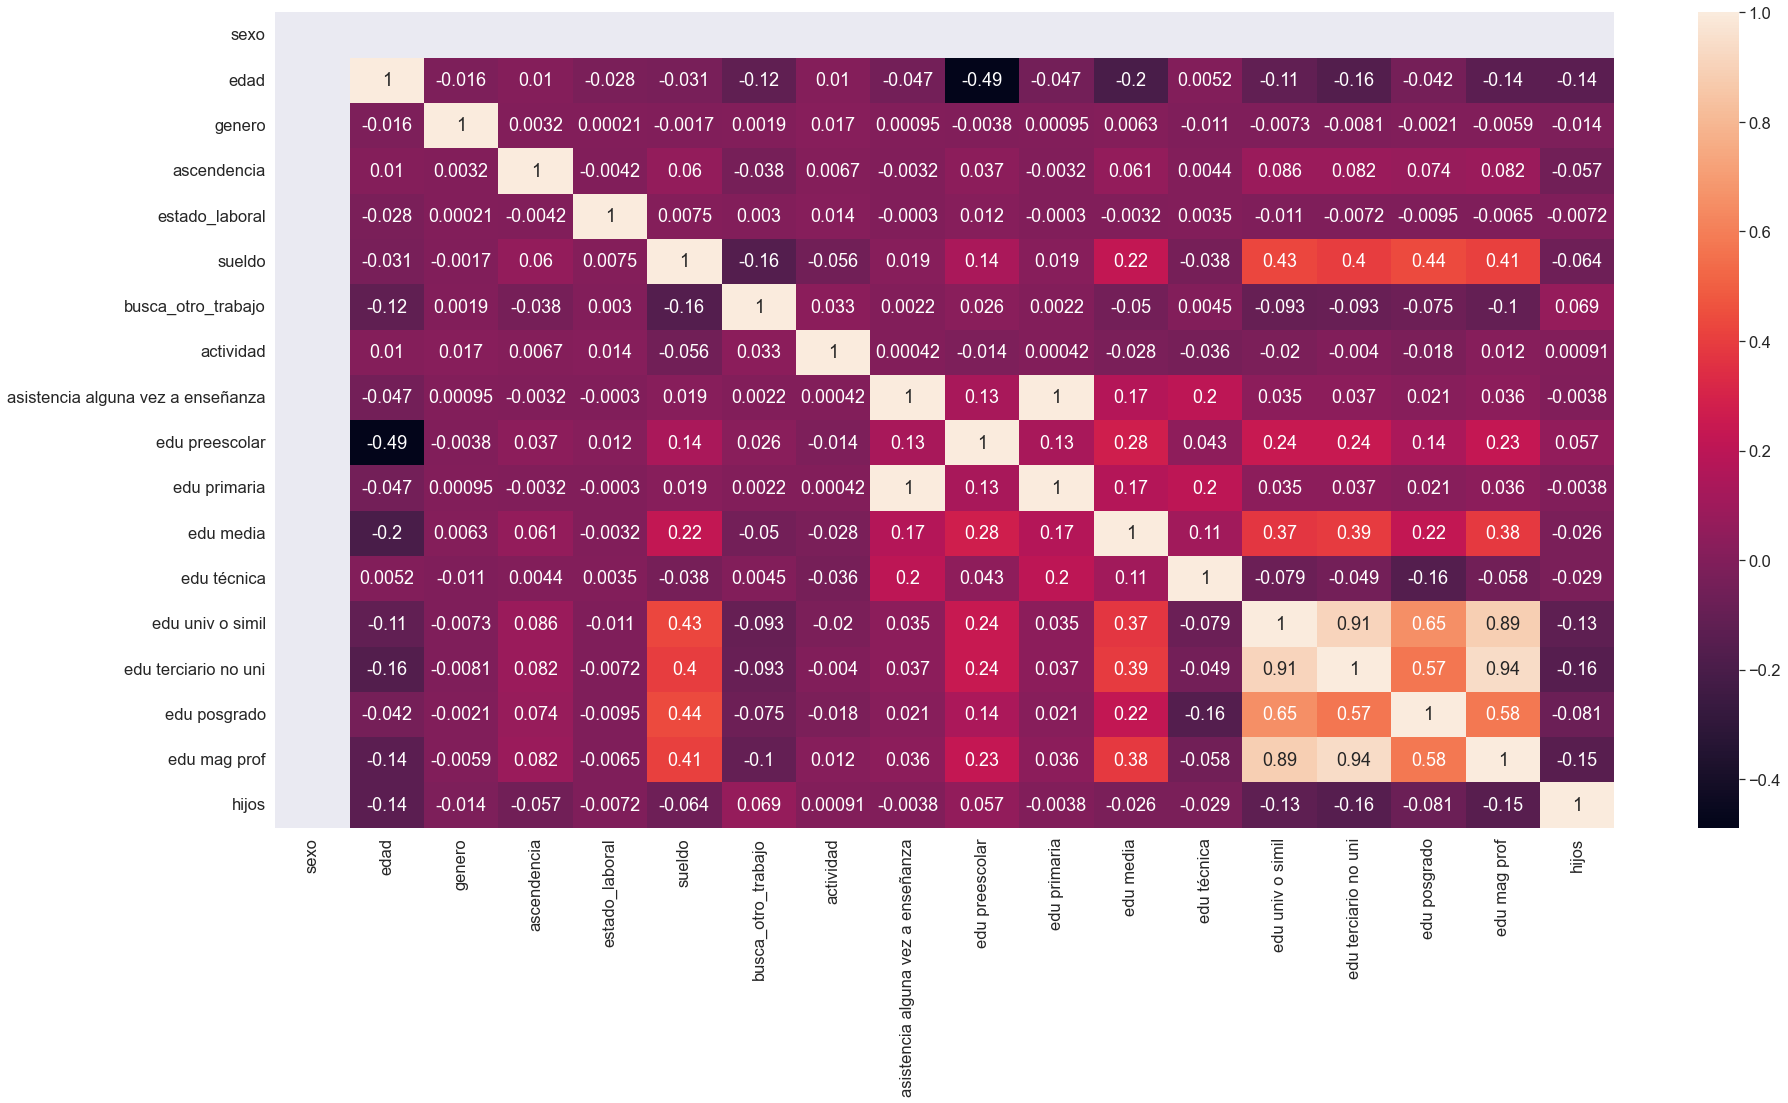

In [5]:
corr = monomarental.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

In [6]:
# Feautures
X = monomarental['actividad'].to_numpy().reshape(-1,1)
y = monomarental['busca_otro_trabajo'].to_numpy()

print('X shape', X.shape, '\nY shape', y.shape)

X shape (14943, 1) 
Y shape (14943,)


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y)

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)

log_reg.score(X, y)

0.8805460750853242

In [9]:
prediction = np.array([100, 20, 200, 320, 10]).reshape(-1,1)
log_reg.predict(prediction)

array([0, 0, 0, 0, 0], dtype=int8)